# <center>Adaptive Exponential Weights Algorithm for <br/> Learning Equilibrium Flows of the Routing Game</center>

In [2]:
# Import necessary libraries
import numpy as np
import time
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mplt
import random
import networkx as nx   # best working with networkx 2.5 to avoid errors
from scipy import integrate
import uuid   #for generating unique id for files and folders
import csv
import pickle

import os
current_dir= os.getcwd()
from decimal import Decimal

In [3]:
# Define a function to plotting with better markers
def marker(T,n):
    marker =[]
    for k in range(n):
        temp = int(np.round(T**(k/n))) - 1
        if temp <=1: temp=1
        if temp not in marker:
            marker.append(temp)
    return marker

## 1. SIOUXFALLS network --- STATIONARY regime

In [4]:
#-------------------------------------
#  Choose a data instance
#------------------------------------
network_name = 'SiouxFalls'
root = os.path.dirname(os.path.abspath('.'))     #Look for the root folder
root = root+'\\TransportationNetworks-master'
directory = current_dir + "/data/"+ network_name + '/'
os.makedirs(os.path.dirname(directory), exist_ok=True)
directory_sol =  current_dir + "/solutions/"+ network_name + '/'
os.makedirs(os.path.dirname(directory_sol), exist_ok=True)

#### Plotting residual value $\Delta(T):= F(X^T) - F(x^*)$ of ExpWeight, AcceleWeight and AdaWeight

Minval of the potential is:  144646.6017085534


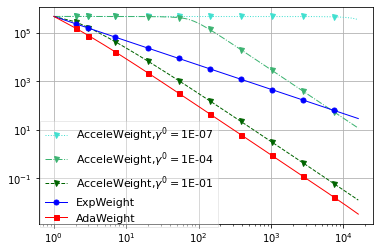

In [6]:
N = 30
pairs = pd.read_csv(directory+'pairs,N='+str(N)+'.csv')
regime = 'stationary'
#-----------------------------------
#  Choose the time T and parameters (corresp. solutions was generated by Main experiences.ipynb)
#-----------------------------------
T=20000
betas = (1/42)*np.array([10000,10,0.01])
beta_best=(1/42)*0.01
percent = 0.8  #Percent of results that will be plotted out

#-------------------------------------
# FOR AcceEW Import results from ./network_name/solutions
#-------------------------------------
df_pot = pd.DataFrame()
for beta in betas:
    folder = directory_sol + '/'+ regime + '/N='+str(N)+', T='+str(T)+ ', beta = ' + str(beta)+'/'
    os.makedirs(os.path.dirname(folder), exist_ok=True)        

    temp = pd.read_csv(folder + '/potAcceEW.csv',header=0)
    dfAcceEW = pd.DataFrame({'potAcceEW'+str(beta):  temp['potAcceEW']})
    df_pot= pd.concat([df_pot,dfAcceEW ], ignore_index=False, axis=1)
    
#-------------------------------------
# FOR EW & AdaEW Import results from ./network_name/solutions/beta=0.0001
#-------------------------------------    
folder = directory_sol + '/'+ regime + '/N='+str(N)+', T='+str(T)+ ', beta = ' + str(beta_best)+'/'
os.makedirs(os.path.dirname(folder), exist_ok=True)

tempEW = pd.read_csv(folder + '/potEW.csv',header=0)
dfEW = pd.DataFrame({'potEW': tempEW['potEW'] })
tempAdaEW = pd.read_csv(folder + '/potAdaEW.csv',header=0)
dfAdaEW = pd.DataFrame({'potAdaEW': tempAdaEW['potAdaEW'] })

df_pot = pd.concat([df_pot,dfEW,dfAdaEW], ignore_index=False, axis=1)

#---------------------------------------------
#  Pre-process: Find min_potential and dropoff tail results
#--------------------------------------------
minval = min(df_pot['potAcceEW'+str(betas[0])])
for beta in betas[1:len(betas)]:
    minval = min(minval, min(df_pot['potAcceEW'+str(beta)]) )

minval= min(minval, min(df_pot['potEW']), min(df_pot['potAdaEW']) )-0.002         #-0.002 to stablelize the tails of the plot; can remove-0.002 
print('Minval of the potential is: ', minval)

T_drop = int(np.round(percent*T))

df_dat = pd.DataFrame()
for beta in betas:
    drop_dat = df_pot['potAcceEW'+str(beta)][0:T_drop] 
    df_dat['potAcceEW'+str(beta)] =  drop_dat- minval
df_dat['potEW'] = df_pot['potEW'][0:T_drop]  - minval
df_dat['potAdaEW'] = df_pot['potAdaEW'][0:T_drop]  - minval
#-------------------------------------------------
#              PLOTTING
#-------------------------------------------
df_plot = pd.DataFrame({'Time':list(range(1,T_drop+1))})
df_plot = pd.concat([df_plot,df_dat], ignore_index=False, axis=1)  #merge results into 1 dataframe

fig, ax = plt.subplots()
pcolor = ['turquoise','mediumseagreen','darkgreen','blue','red','turquoise','gold','midnightblue','orange','silver','fuchsia','pink','chocolate']
legend =[]
count = 0
Time_marker = marker(T,10)


linedash = [':','-.','--']
for i in range(len(betas)):
    beta = betas[i]
    gamma0= 1/(N*beta*max(pairs['demand']))
    ax.loglog( 'Time', 'potAcceEW'+str(beta), data=df_plot,  linestyle= linedash[i],marker = 'v', markevery = Time_marker, color=pcolor[count], linewidth=1,markersize=5)
    legend.append(r'AcceleWeight,$\gamma^0=$'+str("{:.0E}".format(gamma0)) )
    count+=1

ax.loglog( 'Time', 'potEW', data=df_plot,  linestyle='-',marker = 'o', markevery = Time_marker, color=pcolor[count], linewidth=1,markersize=5)
legend.append('ExpWeight') 
count+=1

ax.loglog( 'Time', 'potAdaEW', data=df_plot,  linestyle='-', marker = 's', markevery = Time_marker, color=pcolor[count], linewidth=1,markersize = 5)
legend.append('AdaWeight') 
count+=1

plt.legend(legend,loc='upper center', bbox_to_anchor=(0.27,0.5),ncol=1, frameon=True,  prop={'size': 11},framealpha =0.4, fancybox=False, shadow=False)
plt.grid(True)
plt.savefig(folder+'plot.png',dpi=300,bbox_inches='tight')
plt.show()

#### Plotting the $t^2 \cdot \Delta(T)$

Minval of the potential is:  144646.6017085534


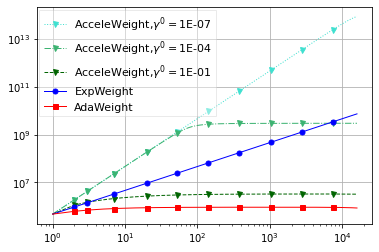

In [7]:
N = 30
pairs = pd.read_csv(directory+'pairs,N='+str(N)+'.csv')
regime = 'stationary'
#-----------------------------------
#  Choose the time T and parameters (corresp. solutions was generated by Main experiences.ipynb)
#-----------------------------------
T=20000
betas = (1/42)*np.array([10000,10,0.01])
percent = 0.8  #Percent of results that will be plotted out
#-------------------------------------
# FoR AcceEW Import results from ./network_name/solutions
#-------------------------------------
df_pot = pd.DataFrame()
for beta in betas:
    folder = directory_sol + '/'+ regime + '/N='+str(N)+', T='+str(T)+ ', beta = ' + str(beta)+'/'
    os.makedirs(os.path.dirname(folder), exist_ok=True)        

    temp = pd.read_csv(folder + '/potAcceEW.csv',header=0)
    dfAcceEW = pd.DataFrame({'potAcceEW'+str(beta):  temp['potAcceEW']})
    df_pot = pd.concat([df_pot,dfAcceEW ], ignore_index=False, axis=1)
#-------------------------------------
# FOR EW & AdaEW Import results from ./network_name/solutions/beta=0.0001
#-------------------------------------    
beta_best=(1/42)*0.01
folder = directory_sol + '/'+ regime + '/N='+str(N)+', T='+str(T)+ ', beta = ' + str(beta_best)+'/'
os.makedirs(os.path.dirname(folder), exist_ok=True)

tempEW = pd.read_csv(folder + '/potEW.csv',header=0)
dfEW = pd.DataFrame({'potEW': tempEW['potEW'] })
tempAdaEW = pd.read_csv(folder + '/potAdaEW.csv',header=0)
dfAdaEW = pd.DataFrame({'potAdaEW': tempAdaEW['potAdaEW'] })

df_pot = pd.concat([df_pot,dfEW,dfAdaEW], ignore_index=False, axis=1)
#---------------------------------------------
#  Pre-process: Find min_potential  
#--------------------------------------------
minval = min(df_pot['potAcceEW'+str(betas[0])])
for beta in betas[1:len(betas)]:
    minval = min(minval, min(df_pot['potAcceEW'+str(beta)]) )
minval= min(minval, min(df_pot['potEW']), min(df_pot['potAdaEW']) )-0.002         #-0.002 to stablelize the tails of the plot; can remove-0.002 
print('Minval of the potential is: ', minval)

#------------------------------------------
#   Minus min, Multiply by t**2 and drop-off
#----------------------------------------
T_drop = int(np.round(percent* T))
t2 = np.arange(1,T_drop+1)*np.arange(1,T_drop+1) # an array t^2 = [1,4,9,16,25,....]
df_dat = pd.DataFrame()
for beta in betas:
    df_dat['potAcceEW'+str(beta)] =  (df_pot['potAcceEW'+str(beta)][0:T_drop] - minval)*t2
df_dat['potEW'] =  (df_pot['potEW'][0:T_drop]  - minval)*t2 
df_dat['potAdaEW'] =  (df_pot['potAdaEW'][0:T_drop]  - minval)*t2 
#-------------------------------------------------
#              PLOTTING
#-------------------------------------------
df_plot = pd.DataFrame({'Time':list(range(1,T_drop+1))})
df_plot = pd.concat([df_plot,df_dat], ignore_index=False, axis=1)  #merge results into 1 dataframe
fig, ax = plt.subplots()
Time_marker = marker(T,10)

pcolor = ['turquoise','mediumseagreen','darkgreen','blue','red','turquoise','gold','midnightblue','orange','silver','fuchsia','pink','chocolate']
legend =[]
count = 0

linedash = [':','-.','--']
for i in range(len(betas)):
    beta = betas[i]
    gamma0= 1/(N*beta*max(pairs['demand']))
    ax.loglog( 'Time', 'potAcceEW'+str(beta), data=df_plot,  linestyle=linedash[i],marker = 'v', markevery = Time_marker, color=pcolor[count], linewidth=1,markersize=5)
    legend.append('AcceleWeight,$\gamma^0=$'+str("{:.0E}".format(gamma0))) 
    count+=1


ax.loglog( 'Time', 'potEW', data=df_plot,  linestyle='-',marker = 'o', markevery = Time_marker, color=pcolor[count], linewidth=1,markersize=5)
legend.append('ExpWeight') 
count+=1

ax.loglog( 'Time', 'potAdaEW', data=df_plot,  linestyle='-', marker = 's', markevery = Time_marker, color=pcolor[count], linewidth=1,markersize=5)
legend.append('AdaWeight') 
count+=1

plt.legend(legend,loc='upper center', bbox_to_anchor=(0.27,1.01),ncol=1, fancybox=False,  prop={'size': 11},framealpha =0.4, frameon=True, shadow=False)
plt.grid(True)
plt.savefig(folder+'plot_t2.png',dpi=300,bbox_inches='tight')
plt.show()

## 2.RANDOM GENERATED network --- STOCHASTIC regime

In [6]:
#-------------------------------------
#  Choose a data instance
#------------------------------------
network_name = 'Random_net'
root = os.path.dirname(os.path.abspath('.'))     #Look for the root folder
root = root+'\\TransportationNetworks-master'
directory = current_dir + "/data/"+ network_name + '/'
os.makedirs(os.path.dirname(directory), exist_ok=True)
directory_sol =  current_dir + "/solutions/"+ network_name + '/'
os.makedirs(os.path.dirname(directory_sol), exist_ok=True)

#### Plotting residual value $\Delta(T):= F(X^T) - F(x^*)$ of ExpWeight, AcceleWeight and AdaWeight

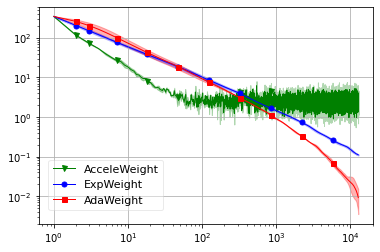

In [7]:
N = 6
regime = 'stochastic'
instances = [0,1]
#-----------------------------------
#  Choose the beta
#-----------------------------------
T=15000
stepsizeEW=0.016666666666666666
gamma0=10
theta=360000
percent = 0.85
minval = 10000   #min val of Stationary case
#------------------------------
#       Import data and find minval
#---------------------------
df_pot = pd.DataFrame()
for instance in instances:
    folder = directory_sol + '/'+ regime+ '/'
    os.makedirs(os.path.dirname(folder), exist_ok=True)
    temp = pd.read_csv(folder + '/Test_stoch_T=15000_instance ='+str(instance)+'.csv',header=0)
    df_pot['potEW'+str(instance)]= temp['rosEW('+str(stepsizeEW)+')']
    df_pot['potAcceEW'+str(instance)]= temp['rosAcceEW('+str(gamma0)+')']
    df_pot['potAdaEW'+str(instance)]= temp['rosAdaEW('+str(theta)+')']
    
    minval = min(minval,min(df_pot['potEW'+str(instance)]),min(df_pot['potAcceEW'+str(instance)]), min(df_pot['potAdaEW'+str(instance)]) )

#-------------------------------------------
#   Average
#-------------------------------------------
df_pot['potEW_avg']=  1/2 * (df_pot['potEW0'] + df_pot['potEW1'])
df_pot['potAcceEW_avg']= 1/2 * (df_pot['potAcceEW0'] + df_pot['potAcceEW1'])
df_pot['potAdaEW_avg']= 1/2 * (df_pot['potAdaEW0'] + df_pot['potAdaEW1'])

#------------------------------------------------------------------------------
#  Pre-process: Substract minval from potential values & Dropoff tail results
#-------------------------------------------------------------------------------
T_drop = int(np.round(percent*  T))
df_dat = pd.DataFrame()
for instance in instances:
    df_dat['potEW'+str(instance)] =  df_pot['potEW'+str(instance)][0:T_drop]  - minval
    df_dat['potAcceEW'+str(instance)] =  df_pot['potAcceEW'+str(instance)][0:T_drop]  - minval 
    df_dat['potAdaEW'+str(instance)] =   df_pot['potAdaEW'+str(instance)][0:T_drop]  - minval

df_dat['potEW_avg'] =  df_pot['potEW_avg'][0:T_drop]  - minval
df_dat['potAcceEW_avg'] =  df_pot['potAcceEW_avg'][0:T_drop]  - minval
df_dat['potAdaEW_avg'] =  df_pot['potAdaEW_avg'][0:T_drop]  - minval


#-------------------------------------------------
#              PLOTTING
#-------------------------------------------
df_plot = pd.DataFrame({'Time':list(range(1,T_drop+1))})
df_plot = pd.concat([df_plot,df_dat], ignore_index=False, axis=1)  
Time_marker = marker(T,10)

#-------------------------
fig, ax = plt.subplots()
ax.set_xscale('log', base=10)
ax.set_yscale('log', base=10)
ax.fill_between(df_plot['Time'], np.minimum(df_plot['potAdaEW0'],df_plot['potAdaEW1'] ) ,np.maximum(df_plot['potAdaEW0'],df_plot['potAdaEW1'] ) , color ='red', alpha=0.3,linewidth=1 )
ax.fill_between(df_plot['Time'], np.minimum(df_plot['potAcceEW0'],df_plot['potAcceEW1']),np.maximum(df_plot['potAcceEW0']  ,df_plot['potAcceEW1']) , color ='green', alpha=0.3,linewidth=1)
ax.fill_between(df_plot['Time'], np.minimum(df_plot['potEW0'],df_plot['potEW1']),np.maximum(df_plot['potEW0']  ,df_plot['potEW1']) , color ='blue', alpha=0.3,linewidth=2)

    
lAcceEW, = ax.loglog( 'Time', 'potAcceEW_avg', data=df_plot,  linestyle='-', marker = 'v', markevery= Time_marker, color='green', linewidth=1,label='AcceleWeight',markersize=5)
lEW, =ax.loglog( 'Time', 'potEW_avg', data=df_plot,  linestyle='-',marker = 'o', markevery= Time_marker, color= 'blue', linewidth=1,label ='ExpWeight',markersize=5)
lAdaEW, =ax.loglog( 'Time', 'potAdaEW_avg', data=df_plot,  linestyle='-',marker = 's', markevery = Time_marker,color= 'red', linewidth=1,label ='AdaWeight',markersize=5)

ax.legend(handles=[lAcceEW, lEW,lAdaEW],loc='upper center', bbox_to_anchor=(0.2,0.32),ncol=1, fancybox=True, shadow=False, prop={'size': 11},framealpha =0.4)
plt.grid(True)
plt.savefig(folder+'plot.png',dpi=300,bbox_inches='tight')
plt.show()

#### Plotting $\sqrt(T) \cdot \Delta(T)$

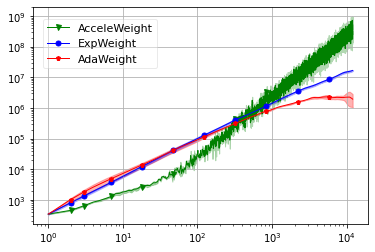

In [8]:
N = 6
regime = 'stochastic'
instances = [0,1]
#-----------------------------------
#  Choose the beta
#-----------------------------------
T=15000
stepsizeEW=0.016666666666666666
gamma0=10
theta=360000
percent = 0.8
#------------------------------------------------------------------------------
#  Pre-process: Substract minval from potential values & Dropoff tail results
#-------------------------------------------------------------------------------
T_drop = int(np.round(percent*  T))
tsq2 = ((np.arange(1,T_drop+1)))**2 # an array t^2 = [1,4,9,16,25,....]
df_dat = pd.DataFrame()
for instance in instances:
    df_dat['potEW'+str(instance)] =  np.array(df_pot['potEW'+str(instance)][0:T_drop]  - minval)*tsq2
    df_dat['potAcceEW'+str(instance)] =  np.array(df_pot['potAcceEW'+str(instance)][0:T_drop]  - minval)*tsq2
    df_dat['potAdaEW'+str(instance)] =   (df_pot['potAdaEW'+str(instance)][0:T_drop]  - minval)*tsq2

#-------------------------------------------
#   Average
#-------------------------------------------
df_dat['potEW_avg']=  1/2 * (df_dat['potEW0'] + df_dat['potEW1'])
df_dat['potAcceEW_avg']= 1/2 * (df_dat['potAcceEW0'] + df_dat['potAcceEW1'])
df_dat['potAdaEW_avg']= 1/2 * (df_dat['potAdaEW0'] + df_dat['potAdaEW1'])

#-------------------------------------------------
#              PLOTTING
#-------------------------------------------
df_plot = pd.DataFrame({'Time':list(range(1,T_drop+1))})
df_plot = pd.concat([df_plot,df_dat], ignore_index=False, axis=1)  
Time_marker = marker(T,10)

#------------------------------------------------------------------
fig, ax = plt.subplots()
ax.set_xscale('log', base=10)
ax.set_yscale('log', base=10)
ax.fill_between(df_plot['Time'], np.minimum(df_plot['potAdaEW0'],df_plot['potAdaEW1'] ) ,np.maximum(df_plot['potAdaEW0'],df_plot['potAdaEW1'] ) , color ='red', alpha=0.3,linewidth=1 )
ax.fill_between(df_plot['Time'], np.minimum(df_plot['potAcceEW0'],df_plot['potAcceEW1']),np.maximum(df_plot['potAcceEW0']  ,df_plot['potAcceEW1']) , color ='green', alpha=0.3,linewidth=1)
ax.fill_between(df_plot['Time'], np.minimum(df_plot['potEW0'],df_plot['potEW1']),np.maximum(df_plot['potEW0']  ,df_plot['potEW1']) , color ='blue', alpha=0.3,linewidth=2)

    
lAcceEW, = ax.loglog( 'Time', 'potAcceEW_avg', data=df_plot,  linestyle='-', marker = 'v', markevery = Time_marker, color='green', linewidth=1,label='AcceleWeight',markersize=5)
lEW, =ax.loglog( 'Time', 'potEW_avg', data=df_plot,  linestyle='-',marker = 'o', markevery = Time_marker, color= 'blue', linewidth=1,label ='ExpWeight',markersize=5)
lAdaEW, =ax.loglog( 'Time', 'potAdaEW_avg', data=df_plot,  linestyle='-',marker = 'p', markevery = Time_marker, color= 'red', linewidth=1,label ='AdaWeight',markersize=5)

ax.legend(handles=[lAcceEW, lEW,lAdaEW],loc='upper center', bbox_to_anchor=(0.2,0.97),ncol=1, fancybox=True,  prop={'size': 11},framealpha =0.4,shadow=False)
plt.grid(True)
plt.savefig(folder+'plot_t2.png',dpi=300,bbox_inches='tight')
plt.show()

#### HIGH-LEVEL NOISY enviroment

101.25126864278326


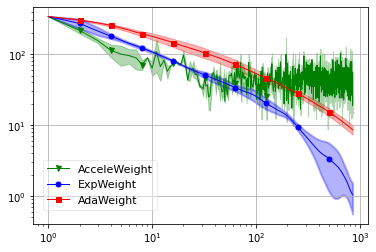

In [9]:
N = 6
regime = 'stochastic'
instances = [0,1]
#-----------------------------------
#  Choose the beta
#-----------------------------------
T=1000
stepsizeEW=0.016666666666666666
gamma0=10
theta=360000
percent = 0.85
minval = 1e8   #min val of Stationary case
#------------------------------
#       Import data and find minval
#---------------------------
df_pot = pd.DataFrame()
for instance in instances:
    folder = directory_sol + '/'+ regime+ '/'
    os.makedirs(os.path.dirname(folder), exist_ok=True)
    temp = pd.read_csv(folder + '/Test_stoch_T=1000_instance ='+str(instance)+'.csv',header=0)
    df_pot['potEW'+str(instance)]= temp['rosEW('+str(stepsizeEW)+')']
    df_pot['potAcceEW'+str(instance)]= temp['rosAcceEW('+str(gamma0)+')']
    df_pot['potAdaEW'+str(instance)]= temp['rosAdaEW('+str(theta)+')']
    
    minval = min(minval,min(df_pot['potEW'+str(instance)]),min(df_pot['potAcceEW'+str(instance)]), min(df_pot['potAdaEW'+str(instance)]) )

print(minval)
#-------------------------------------------
#   Average
#-------------------------------------------
df_pot['potEW_avg']=  1/2 * (df_pot['potEW0'] + df_pot['potEW1'])
df_pot['potAcceEW_avg']= 1/2 * (df_pot['potAcceEW0'] + df_pot['potAcceEW1'])
df_pot['potAdaEW_avg']= 1/2 * (df_pot['potAdaEW0'] + df_pot['potAdaEW1'])


#------------------------------------------------------------------------------
#  Pre-process: Substract minval from potential values & Dropoff tail results
#-------------------------------------------------------------------------------
T_drop = int(np.round(percent*  T))
df_dat = pd.DataFrame()
for instance in instances:
    df_dat['potEW'+str(instance)] =  df_pot['potEW'+str(instance)][0:T_drop]  - minval
    df_dat['potAcceEW'+str(instance)] =  df_pot['potAcceEW'+str(instance)][0:T_drop]  - minval 
    df_dat['potAdaEW'+str(instance)] =   df_pot['potAdaEW'+str(instance)][0:T_drop]  - minval

df_dat['potEW_avg'] =  df_pot['potEW_avg'][0:T_drop]  - minval
df_dat['potAcceEW_avg'] =  df_pot['potAcceEW_avg'][0:T_drop]  - minval
df_dat['potAdaEW_avg'] =  df_pot['potAdaEW_avg'][0:T_drop]  - minval


#-------------------------------------------------
#              PLOTTING
#-------------------------------------------
df_plot = pd.DataFrame({'Time':list(range(1,T_drop+1))})
df_plot = pd.concat([df_plot,df_dat], ignore_index=False, axis=1)  
Time_marker = marker(T,10)

#-------------------------
fig, ax = plt.subplots()
ax.set_xscale('log', base=10)
ax.set_yscale('log', base=10)
ax.fill_between(df_plot['Time'], np.minimum(df_plot['potAdaEW0'],df_plot['potAdaEW1'] ) ,np.maximum(df_plot['potAdaEW0'],df_plot['potAdaEW1'] ) , color ='red', alpha=0.3,linewidth=1 )
ax.fill_between(df_plot['Time'], np.minimum(df_plot['potAcceEW0'],df_plot['potAcceEW1']),np.maximum(df_plot['potAcceEW0']  ,df_plot['potAcceEW1']) , color ='green', alpha=0.3,linewidth=1)
ax.fill_between(df_plot['Time'], np.minimum(df_plot['potEW0'],df_plot['potEW1']),np.maximum(df_plot['potEW0']  ,df_plot['potEW1']) , color ='blue', alpha=0.3,linewidth=2)

    
lAcceEW, = ax.loglog( 'Time', 'potAcceEW_avg', data=df_plot,  linestyle='-', marker = 'v', markevery= Time_marker, color='green', linewidth=1,label='AcceleWeight',markersize=5)
lEW, =ax.loglog( 'Time', 'potEW_avg', data=df_plot,  linestyle='-',marker = 'o', markevery= Time_marker, color= 'blue', linewidth=1,label ='ExpWeight',markersize=5)
lAdaEW, =ax.loglog( 'Time', 'potAdaEW_avg', data=df_plot,  linestyle='-',marker = 's', markevery = Time_marker,color= 'red', linewidth=1,label ='AdaWeight',markersize=5)

ax.legend(handles=[lAcceEW, lEW,lAdaEW],loc='upper center', bbox_to_anchor=(0.2,0.32),ncol=1, fancybox=True, shadow=False, prop={'size': 11},framealpha =0.4)
plt.grid(True)
plt.savefig(folder+'plot_noise.png',dpi=300,bbox_inches='tight')
plt.show()

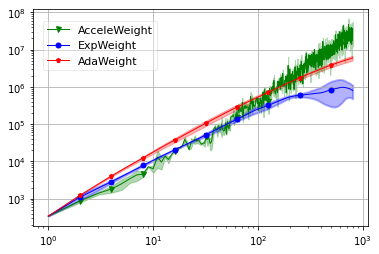

In [10]:
N = 6
regime = 'stochastic'
instances = [0,1]
#-----------------------------------
#  Choose the beta
#-----------------------------------
T=1000
stepsizeEW=0.016666666666666666
gamma0=10
theta=360000
percent = 0.8
#------------------------------------------------------------------------------
#  Pre-process: Substract minval from potential values & Dropoff tail results
#-------------------------------------------------------------------------------
T_drop = int(np.round(percent*  T))
tsq2 = ((np.arange(1,T_drop+1)))**2 # an array t^2 = [1,4,9,16,25,....]
df_dat = pd.DataFrame()
for instance in instances:
    df_dat['potEW'+str(instance)] =  np.array(df_pot['potEW'+str(instance)][0:T_drop]  - minval)*tsq2
    df_dat['potAcceEW'+str(instance)] =  np.array(df_pot['potAcceEW'+str(instance)][0:T_drop]  - minval)*tsq2
    df_dat['potAdaEW'+str(instance)] =   (df_pot['potAdaEW'+str(instance)][0:T_drop]  - minval)*tsq2

#-------------------------------------------
#   Average
#-------------------------------------------
df_dat['potEW_avg']=  1/2 * (df_dat['potEW0'] + df_dat['potEW1'])
df_dat['potAcceEW_avg']= 1/2 * (df_dat['potAcceEW0'] + df_dat['potAcceEW1'])
df_dat['potAdaEW_avg']= 1/2 * (df_dat['potAdaEW0'] + df_dat['potAdaEW1'])

#-------------------------------------------------
#              PLOTTING
#-------------------------------------------
df_plot = pd.DataFrame({'Time':list(range(1,T_drop+1))})
df_plot = pd.concat([df_plot,df_dat], ignore_index=False, axis=1)  
Time_marker = marker(T,10)

#------------------------------------------------------------------
fig, ax = plt.subplots()
ax.set_xscale('log', base=10)
ax.set_yscale('log', base=10)
ax.fill_between(df_plot['Time'], np.minimum(df_plot['potAdaEW0'],df_plot['potAdaEW1'] ) ,np.maximum(df_plot['potAdaEW0'],df_plot['potAdaEW1'] ) , color ='red', alpha=0.3,linewidth=1 )
ax.fill_between(df_plot['Time'], np.minimum(df_plot['potAcceEW0'],df_plot['potAcceEW1']),np.maximum(df_plot['potAcceEW0']  ,df_plot['potAcceEW1']) , color ='green', alpha=0.3,linewidth=1)
ax.fill_between(df_plot['Time'], np.minimum(df_plot['potEW0'],df_plot['potEW1']),np.maximum(df_plot['potEW0']  ,df_plot['potEW1']) , color ='blue', alpha=0.3,linewidth=2)

    
lAcceEW, = ax.loglog( 'Time', 'potAcceEW_avg', data=df_plot,  linestyle='-', marker = 'v', markevery = Time_marker, color='green', linewidth=1,label='AcceleWeight',markersize=5)
lEW, =ax.loglog( 'Time', 'potEW_avg', data=df_plot,  linestyle='-',marker = 'o', markevery = Time_marker, color= 'blue', linewidth=1,label ='ExpWeight',markersize=5)
lAdaEW, =ax.loglog( 'Time', 'potAdaEW_avg', data=df_plot,  linestyle='-',marker = 'p', markevery = Time_marker, color= 'red', linewidth=1,label ='AdaWeight',markersize=5)

ax.legend(handles=[lAcceEW, lEW,lAdaEW],loc='upper center', bbox_to_anchor=(0.2,0.97),ncol=1, fancybox=True,  prop={'size': 11},framealpha =0.4,shadow=False)
plt.grid(True)
plt.savefig(folder+'plot_t2_noise.png',dpi=300,bbox_inches='tight')
plt.show()

## 3. Eastern-Massachusetts network---Stationary regime

In [21]:
#-------------------------------------
#  Choose a data instance
#------------------------------------
network_name = 'Eastern-Massachusetts'
root = os.path.dirname(os.path.abspath('.'))     #Look for the root folder
root = root+'\\TransportationNetworks-master'
directory = current_dir + "/data/"+ network_name + '/'
os.makedirs(os.path.dirname(directory), exist_ok=True)
directory_sol =  current_dir + "/solutions/"+ network_name + '/'
os.makedirs(os.path.dirname(directory_sol), exist_ok=True)

#### Plotting residual value $\Delta(T):= F(X^T) - F(x^*)$ of ExpWeight, AcceleWeight and AdaWeight

Minval of the potential: 2231.1176117186747


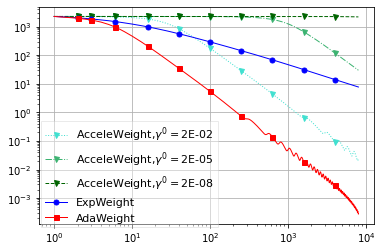

In [22]:
N = 50
pairs = pd.read_csv(directory+'pairs,N='+str(N)+'.csv')
regime = 'stationary'
#-----------------------------------
#  Choose the time T and parameters (corresp. solutions was generated by Main experiences.ipynb)
#-----------------------------------
T=10000
betas = [0.001,1,1000]
beta_best=0.001
percent = 0.8  #Percent of results that will be plotted out
#-------------------------------------
# FOR AcceEW Import results from ./network_name/solutions
#-------------------------------------
df_pot = pd.DataFrame()
for beta in betas:
    folder = directory_sol + '/'+ regime + '/N='+str(N)+', T='+str(T)+ ', beta = ' + str(beta)+'/'
    os.makedirs(os.path.dirname(folder), exist_ok=True)        

    temp = pd.read_csv(folder + '/potAcceEW.csv',header=0)
    dfAcceEW = pd.DataFrame({'potAcceEW'+str(beta):  temp['potAcceEW']})
    df_pot= pd.concat([df_pot,dfAcceEW ], ignore_index=False, axis=1)
#-------------------------------------
# FOR EW & AdaEW Import results from ./network_name/solutions/beta=0.0001
#-------------------------------------    
folder = directory_sol + '/'+ regime + '/N='+str(N)+', T='+str(T)+ ', beta = ' + str(beta_best)+'/'
os.makedirs(os.path.dirname(folder), exist_ok=True)

tempEW = pd.read_csv(folder + '/potEW.csv',header=0)
dfEW = pd.DataFrame({'potEW': tempEW['potEW'] })
tempAdaEW = pd.read_csv(folder + '/potAdaEW.csv',header=0)
dfAdaEW = pd.DataFrame({'potAdaEW': tempAdaEW['potAdaEW'] })
df_pot = pd.concat([df_pot,dfEW,dfAdaEW], ignore_index=False, axis=1)
#---------------------------------------------
#  Pre-process: Find min_potential and dropoff tail results
#--------------------------------------------
minval = min(df_pot['potAcceEW'+str(betas[0])])
for beta in betas[1:len(betas)]:
    minval = min(minval, min(df_pot['potAcceEW'+str(beta)]) )

minval= min(minval, min(df_pot['potEW']), min(df_pot['potAdaEW']) )    #-0.002 to stablelize the tails of the plot; can remove-0.002 
print('Minval of the potential:', minval)
T_drop = int(np.round(percent*T))

df_dat = pd.DataFrame()
for beta in betas:
    drop_dat = df_pot['potAcceEW'+str(beta)][0:T_drop] 
    df_dat['potAcceEW'+str(beta)] =  drop_dat- minval
df_dat['potEW'] = df_pot['potEW'][0:T_drop]  - minval
df_dat['potAdaEW'] = df_pot['potAdaEW'][0:T_drop]  - minval
#-------------------------------------------------
#              PLOTTING
#-------------------------------------------
#Create the x-axis time line
df_plot = pd.DataFrame({'Time':list(range(1,T_drop+1))})
df_plot = pd.concat([df_plot,df_dat], ignore_index=False, axis=1)  #merge results into 1 dataframe
Time_marker = marker(T,10)

fig, ax = plt.subplots()
pcolor = ['turquoise','mediumseagreen','darkgreen','blue','red','turquoise','gold','midnightblue','orange','silver','fuchsia','pink','chocolate']
legend =[]
count = 0
linedash = [':','-.','--']
for i in range(len(betas)):
    beta = betas[i]
    gamma0= 1/(N*beta*max(pairs['demand']))
    ax.loglog( 'Time', 'potAcceEW'+str(beta), data=df_plot,  linestyle=linedash[i],marker = 'v', markevery = Time_marker, color=pcolor[count], linewidth=1,markersize=5)
    legend.append(r'AcceleWeight,$\gamma^0=$'+str("{:.0E}".format(gamma0)) )
    count+=1
ax.loglog( 'Time', 'potEW', data=df_plot,  linestyle='-',marker = 'o', markevery = Time_marker, color=pcolor[count], linewidth=1,markersize=5)
legend.append('ExpWeight') 
count+=1
ax.loglog( 'Time', 'potAdaEW', data=df_plot,  linestyle='-', marker = 's', markevery = Time_marker, color=pcolor[count], linewidth=1,markersize=5)
legend.append('AdaWeight') 
count+=1


plt.legend(legend,loc='upper center', bbox_to_anchor=(0.27,0.5),ncol=1, frameon=True,  prop={'size': 11},framealpha =0.4, fancybox=False, shadow=False)
plt.grid(True)
plt.savefig(folder+'plot.png',dpi=300,bbox_inches='tight')
plt.show()